# Abalone

### Data:
* X_train (3341, 8)
* Y_train (3341,)

* X_test (836, 8)
* Y_test (836,)

### Source:
* https://archive.ics.uci.edu/ml/datasets/abalone

In [1]:
import math
import numpy as np

import tensorflow as tf
from tensorflow.python.framework import ops
import shutil
import pandas as pd
from tensorflow import keras

from sklearn.model_selection import train_test_split
import sklearn.metrics

import matplotlib.pyplot as plt

C:\Users\abido\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Loading the data

In [10]:
data = pd.read_csv('abalone_data.txt', header = None, names = ["Sex","Length", "Diameter", "Height", "WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"])

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


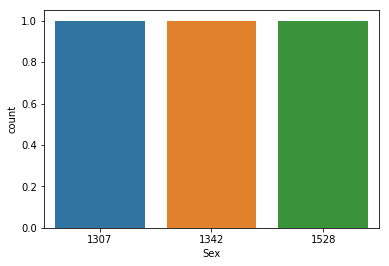

In [11]:
import seaborn as sns
sns.countplot(data['Sex'].value_counts())
print(data['Sex'].value_counts())

### Data Preprocessing

In [12]:
# converting to labels
cleanup_nums = {"Sex":     {"M": 1, "I": 2, "F": 3}}
data.replace(cleanup_nums, inplace=True)


X = data.iloc[:,0:8]
Y = data.iloc[:,8]

# splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# normalizing
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


X_train, X_test = np.array(X_train).T, np.array(X_test).T
Y_train, Y_test = np.array(Y_train).reshape((1,len(Y_train))), np.array(Y_test).reshape((1,len(Y_test)))

In [13]:
print("Training data shape:")
print("Input: {}".format(X_train.shape))
print("Output: {}".format(Y_train.shape))
print("Test data shape :")
print("Input: {}".format(X_test.shape))
print("Output: {}".format(Y_test.shape))

Training data shape:
Input: (8, 3341)
Output: (1, 3341)
Test data shape :
Input: (8, 836)
Output: (1, 836)


### Model

In [14]:
learning_rate = 0.01
training_epochs = 2000
batch_size = 100
display_step = 50
tf.reset_default_graph()

In [15]:
X = tf.placeholder(tf.float32, [8, None]) 
Y = tf.placeholder(tf.float32, [1, None])


W1 = tf.get_variable("W1", [25, 8], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [1, 12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())


Z1 = tf.add(tf.matmul(W1,X), b1)                                              # Z1 = np.dot(W1, X) + b1
A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
Z2 = tf.add(tf.matmul(W2,A1), b2)                                              # Z2 = np.dot(W2, a1) + b2
A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)
Z3 = tf.add(tf.matmul(W3,A2), b3)

In [17]:
#Cost
cost = tf.losses.mean_squared_error(Y, Z3)
# loss = tf.reduce_mean(tf.square(Y - Z3))

# Gradient Descent
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

### Training

In [18]:
init = tf.global_variables_initializer()


costs = [[],[]]


with tf.Session() as sess:
    sess.run(init)
   
    # Training cycle
    for epoch in range(training_epochs):
        _, c = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
        if (epoch+1) % 10 == 0:    
            costs[0].append(c)
            costs[1].append(cost.eval(feed_dict={X: X_test, Y: Y_test}))
        
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    predictions = Z3.eval(feed_dict={X: X_test, Y: Y_test})


Epoch: 0050 cost= 6.249394894
Epoch: 0100 cost= 4.940390587
Epoch: 0150 cost= 4.969486237
Epoch: 0200 cost= 4.659917831
Epoch: 0250 cost= 4.860515118
Epoch: 0300 cost= 4.689832687
Epoch: 0350 cost= 4.691543102
Epoch: 0400 cost= 4.423045158
Epoch: 0450 cost= 4.660126209
Epoch: 0500 cost= 4.415105343
Epoch: 0550 cost= 4.630661011
Epoch: 0600 cost= 4.566208363
Epoch: 0650 cost= 4.256460190
Epoch: 0700 cost= 4.742597580
Epoch: 0750 cost= 4.214255810
Epoch: 0800 cost= 4.390522003
Epoch: 0850 cost= 4.594170094
Epoch: 0900 cost= 4.154195786
Epoch: 0950 cost= 4.383403301
Epoch: 1000 cost= 4.562758446
Epoch: 1050 cost= 4.140056610
Epoch: 1100 cost= 4.366417885
Epoch: 1150 cost= 4.167815685
Epoch: 1200 cost= 4.045351505
Epoch: 1250 cost= 4.173491001
Epoch: 1300 cost= 4.102991104
Epoch: 1350 cost= 4.088209152
Epoch: 1400 cost= 4.371759415
Epoch: 1450 cost= 4.041577339
Epoch: 1500 cost= 4.015740395
Epoch: 1550 cost= 4.210534096
Epoch: 1600 cost= 3.881056070
Epoch: 1650 cost= 4.101925373
Epoch: 170

### Results

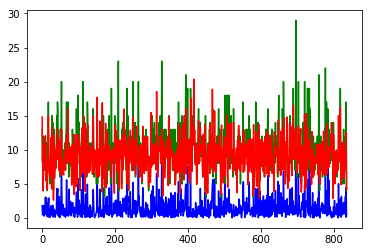

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.abs(Y_test - predictions)[0], color = 'blue')
plt.plot(Y_test[0], color = 'green')
plt.plot(predictions[0], color = 'red')

In [22]:
sklearn.metrics.mean_absolute_error(Y_test, predictions)
# alternatively, np.sum(np.abs(Y_test-predictions))/836

1.5482119279044666

In [23]:
np.sum(np.abs(Y_test-predictions))/836

1.5482119279044666